In [1]:
pip install wntr

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import all classes and modules that are required to simulate your WDN model.
import wntr
import wntr.metrics.economic as metrics    # This module is used for pump energy calculation.
import wntr.network.controls as controls    # This module is used to change pump operation (attack to pump).
import pandas as pd

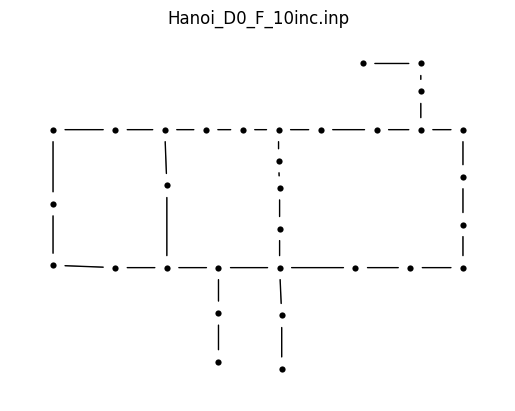

<AxesSubplot: title={'center': 'Hanoi_D0_F_10inc.inp'}>

In [5]:
# Create a water network model.

inp_file = 'Hanoi_D0_F_10inc.inp'   # Write the name of your EPANET inp file. Make sure to include the file extensino.

wn = wntr.network.WaterNetworkModel(inp_file)   # Load your inp file on WNTR model.
wn.options.hydraulic.demand_model = 'PDD'   # Your inp file would be already set as Pressure-driven analysis.

wntr.graphics.plot_network(wn, title=wn.name)  # If you want to check your WDN profile, remove # at the beginning of the code.

In [6]:
# Run your WDN model.

sim = wntr.sim.WNTRSimulator(wn)    # This means that your will use WNTR simulator to simulate your WDN model.
results = sim.run_sim()    # Now, your WDN model run using WNTR simulator.

In [7]:
# Get results for supplied demand, nodal head and pressure, and flowrate.

Demand = results.node["demand"]      # WNTR always uses SI units. Demand has m3/s.
Head = results.node["head"]          # Head's unit is meter.
Pressure = results.node["pressure"]  # Pressure's unit is meter (not psi.).
Flowrate = results.link["flowrate"]  # This is used to calculate pump power.

In [8]:
'''# Get results for power use and energy consumption (pump)
# If the WDN has multiple pumps, you need to copy and paste this code and change the pump names, node names, and variable names.

pump_flow = Flowrate[['38']]  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pump_head = Head[['DR2', 'DT2']]  # Here, '1' and '2' are the names of start and end nodes of the pump pipe. Thus, if needed, you should change.

Pump_power = metrics.pump_power(pump_flow, pump_head, wn)  # This caculates pump power time series. Power unit is Watt.
Pump_energy = metrics.pump_energy(pump_flow, pump_head, wn) # This calculates pump energy time series. Energy unit is J (=Watt *time)
Energy = pd.concat([Pump_power, Pump_energy], axis=1)  # like previous box, now you get Energy data. You can evaluate average or peak energy based on this data.
Energy.columns = ['Power (watts)', 'Energy (J)']

# This algorithm (above) can have an error if the network inp file has a pump efficiency curve. Then, use the following algorithm.

# If a pump efficiency is defined in your inp file, use the algorithm below to calculate energy.
# But, you should provide the numerical values of average pump_efficiency - you can find it in Energy Rerpot in EPANET.


Energy = pd.DataFrame()
pump_efficiency = 0.75    # This should be provided.

pumpLWP1_flow = Flowrate['LWP1']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pumpLWP1_head = abs(Head['LR1'] - Head['LT1'])

powerLWP1 = 1000.0 * 9.81 * pumpLWP1_head * pumpLWP1_flow / pump_efficiency
energyLWP1 = powerLWP1 * wn.options.time.report_timestep

Energy["pumpLWP1_power"] = powerLWP1
Energy["pumpLWP1_energy"] = energyLWP1



pump_efficiency = 0.75    # This should be provided.

pumpLWP2_flow = Flowrate['LWP2']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pumpLWP2_head = abs(Head['LR2'] - Head['LT2'])

powerLWP2 = 1000.0 * 9.81 * pumpLWP2_head * pumpLWP2_flow / pump_efficiency
energyLWP2 = powerLWP2 * wn.options.time.report_timestep

Energy["pumpLWP2_power"] = powerLWP2
Energy["pumpLWP2_energy"] = energyLWP2


pump_efficiency = 0.75    # This should be provided.

pumpLWP3_flow = Flowrate['LWP3']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pumpLWP3_head = abs(Head['LR3'] - Head['LT3'])

powerLWP3 = 1000.0 * 9.81 * pumpLWP3_head * pumpLWP3_flow / pump_efficiency
energyLWP3 = powerLWP3 * wn.options.time.report_timestep

Energy["pumpLWP3_power"] = powerLWP3
Energy["pumpLWP3_energy"] = energyLWP3



'''



'# Get results for power use and energy consumption (pump)\n# If the WDN has multiple pumps, you need to copy and paste this code and change the pump names, node names, and variable names.\n\npump_flow = Flowrate[[\'38\']]  # Here, \'9\' is the pump name. Thus, you should change this with your WND\'s pump name.\npump_head = Head[[\'DR2\', \'DT2\']]  # Here, \'1\' and \'2\' are the names of start and end nodes of the pump pipe. Thus, if needed, you should change.\n\nPump_power = metrics.pump_power(pump_flow, pump_head, wn)  # This caculates pump power time series. Power unit is Watt.\nPump_energy = metrics.pump_energy(pump_flow, pump_head, wn) # This calculates pump energy time series. Energy unit is J (=Watt *time)\nEnergy = pd.concat([Pump_power, Pump_energy], axis=1)  # like previous box, now you get Energy data. You can evaluate average or peak energy based on this data.\nEnergy.columns = [\'Power (watts)\', \'Energy (J)\']\n\n# This algorithm (above) can have an error if the networ

In [10]:
# Export the simulation results to Excel spreadsheets.
excel_results2 = pd.ExcelWriter('wntr_results_hanoi_D0_10.xlsx')   # An excel file is created. You can change the file name anytime.
Demand.to_excel(excel_results2, sheet_name='Demand')   # A spreadsheet for the result about supplied water to nodes
Head.to_excel(excel_results2, sheet_name='Head')       # A spreadsheet for the result about nodal hydraulic head (elevation + pressure)
Pressure.to_excel(excel_results2, sheet_name='Pressure')  # A spreadsheet for the result about nodal pressure
#Energy.to_excel(excel_results2, sheet_name='Energy')     # A spreadsheet for the result about energy/power use. Here, first and second columns are power and energy, respectively.
excel_results2.close()
